In [5]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data'
os.chdir(base_dir) 
from core import expression_plots 
from core import io_library 
#from IPython.core.debugger import Tracer
import numpy as np
import pandas as pd
#import re
#import matplotlib.pyplot as plt 
#import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [6]:
#Load various SC NMPP1 experiment data

#load raw data for NMPP1 experiments from Capaldi Paper
desired_conditions = [('100uM NMPP1','GSM1423542')]
data_dir = base_dir + '\expression_data\GSE58992_Capaldi_2014\\'
GEO_accession = 'GSE58992'
capaldi_SC_PKA_data = io_library.parse_data_series_matrix_SC(desired_conditions, data_dir, GEO_accession)

#Load PKA inhibition data for O'shea
desired_conditions = [('No 1-NMPP1 0 min','GSM812516'), ('3uM 1-NMPP1 40 min','GSM812520')]   
data_dir = base_dir + '\expression_data\GSE32703_NMPP1_SC\\' 
GEO_accession = 'GSE32703'
oshea_SC_PKA_data = io_library.parse_data_series_matrix_SC(desired_conditions, data_dir, GEO_accession)
oshea_SC_PKA_data['PKA inhibition 3uM 1NMPP1'] = oshea_SC_PKA_data.iloc[:,1].sub(oshea_SC_PKA_data.iloc[:,0])

#Load Kieran's PKA inhibition data
fname_mace_SC_PKA_data = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\SC_1NMPP1_From_Kieran.tsv')
mace_SC_PKA_data = pd.read_table(fname_mace_SC_PKA_data, sep = ' ', index_col = [0])
mace_SC_PKA_data.columns = ['WT_minus','AS_plus','WT_plus']

#Normalize by the total number of reads
mace_SC_PKA_data_total_reads = mace_SC_PKA_data.sum(axis = 'rows')
mace_SC_PKA_data_norm = pd.DataFrame(index = mace_SC_PKA_data.index)
#normalize by total aligned reads, adding in a single pseudocount to avoid dividing by zero
for sample in mace_SC_PKA_data.columns: 
    mace_SC_PKA_data_norm[sample] = (mace_SC_PKA_data[sample]+1)/mace_SC_PKA_data_total_reads[sample]

#Make Fold change columns
mace_SC_PKA_data_norm['WT_log_fold_change']=np.log(mace_SC_PKA_data_norm['WT_plus']/mace_SC_PKA_data_norm['WT_minus'])/np.log(2.0)
mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'] = np.log(mace_SC_PKA_data_norm['AS_plus']/mace_SC_PKA_data_norm['WT_minus'])/np.log(2.0)

#Load Susan's TPK-AS NMPP1 data
fname_SYC_SC_PKA_plus = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq_SYC\NMPP_abundance_paired.tsv')
SYC_SC_PKA_plus = pd.read_table(fname_SYC_SC_PKA_plus, sep = '\t', index_col = [0])
#SYC_SC_PKA_plus.columns are: ['length','eff_length','est_counts','TPM']
SYC_SC_PKA_plus_total_reads = SYC_SC_PKA_plus['est_counts'].sum(axis = 'rows')
SYC_SC_PKA_plus_norm = pd.DataFrame(index = SYC_SC_PKA_plus.index)
SYC_SC_PKA_plus_norm['AS_plus'] = (SYC_SC_PKA_plus['est_counts']+1)/SYC_SC_PKA_plus_total_reads


fname_SYC_SC_PKA_minus = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq_SYC\\none_abundance_paired.tsv')
SYC_SC_PKA_minus = pd.read_table(fname_SYC_SC_PKA_minus, sep = '\t', index_col = [0])
#SYC_SC_PKA_minus.columns are: ['length','eff_length','est_counts','TPM']
SYC_SC_PKA_minus_total_reads = SYC_SC_PKA_minus['est_counts'].sum(axis = 'rows')
SYC_SC_PKA_minus_norm = pd.DataFrame(index = SYC_SC_PKA_minus.index)
SYC_SC_PKA_minus_norm['AS_minus'] = (SYC_SC_PKA_minus['est_counts']+1)/SYC_SC_PKA_minus_total_reads

SYC_SC_PKA_data_norm = pd.concat([SYC_SC_PKA_plus_norm, SYC_SC_PKA_minus_norm], axis = 1 )
SYC_SC_PKA_data_norm['AS_log_fold_change'] = np.log(SYC_SC_PKA_data_norm['AS_plus']/SYC_SC_PKA_data_norm['AS_minus'])/np.log(2.0)

#Load Broach NMPP1 data

#Merge SCer PKA data
SC_PKA_data_norm = pd.concat([SYC_SC_PKA_data_norm['AS_log_fold_change'], mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'],oshea_SC_PKA_data['PKA inhibition 3uM 1NMPP1'], capaldi_SC_PKA_data['100uM NMPP1'] ],axis = 1)
SC_PKA_data_norm.columns = ['Chen','Pincus','Oshea','Capaldi']



<IPython.core.display.Javascript object>


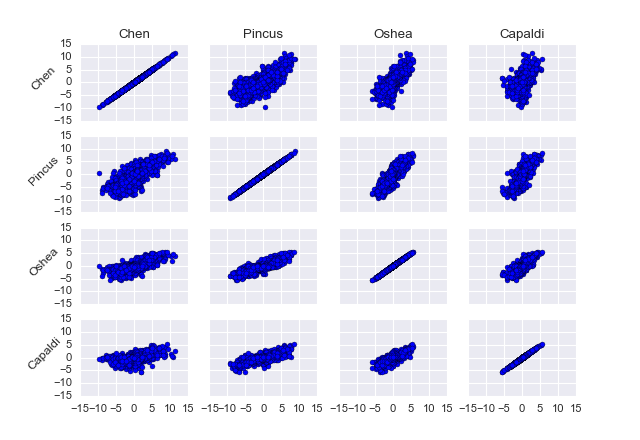

In [7]:
conditions = ['Chen','Pincus','Oshea','Capaldi']
fig, axarr = expression_plots.multi_scatter_plot(SC_PKA_data_norm, conditions)

Based on the above plot, the Pincus dataset looks like the best current RNA seq dataset since it correlates well with Oshea and Capaldi.  It only has one repeat so in the end I went with the Oshea microarray data and averaged the 30min and 40min timepoints.  

<IPython.core.display.Javascript object>


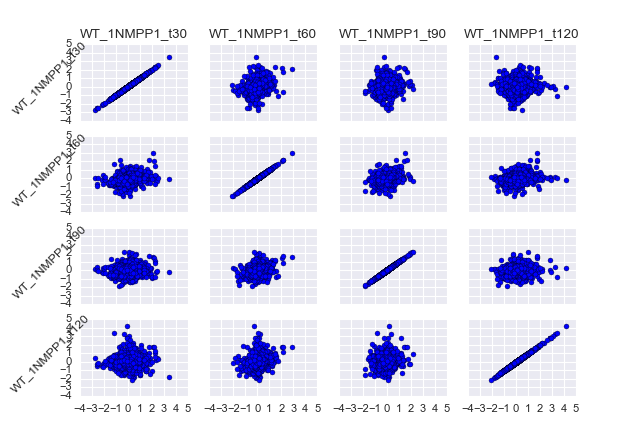

In [8]:
#Looking at NMPP1 only data from the shokat lab - the results weren't very illuminating - maybe that is a bad dataset. 

#Shokat Lab
fname_kung_SC_WT_NMPP1 = os.path.normpath(base_dir + '\expression_data\NMPP1_WT_Timecourse\\07170DataSet4.txt')
kung_SC_WT_NMPP1 = pd.read_table(fname_kung_SC_WT_NMPP1, sep = '\t', index_col = [0])
conditions_orig = kung_SC_WT_NMPP1.columns[1:]
conditions=  []
for condition in conditions_orig: 
    time = condition.split()[1]
    new_condition = 'WT_1NMPP1_t'+time
    conditions.append(new_condition)
    kung_SC_WT_NMPP1[new_condition]=np.log(kung_SC_WT_NMPP1[condition])/np.log(2)

#xlim = [-2, 7]
#xticks = [0.0,0.006,0.012]
#ylim = [-2, 7]
#yticks([0.0,0.006,0.012])
fig, axarr = expression_plots.multi_scatter_plot(kung_SC_WT_NMPP1, conditions) # xlim = xlim, ylim = ylim)


#Broach

#Merge NMPP1 only data with PKA data

#Scatter Plot